In [311]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
from collections import defaultdict
import pybedtools

In [87]:
fn = '/projects/ps-yeolab3/bay001/annotations/data/regions/hg19_v19_cds.bed'
df = pd.read_table(fn, names=['chrom','start','end','name','score','strand'])

In [88]:
regions = defaultdict(list)
with open(fn) as f:
    for line in f:
        _, _, _, name, _, _ = line.split('\t')
        regions[name].append(line.split('\t'))

In [306]:
def merge2(fn):
    """
    Takes a list of regions and merges them
    """
    unmerged = pybedtools.BedTool(fn).sort()
    merged = unmerged.merge(s=True, c=[4,4], o='collapse,count')
    merged = merged.to_dataframe()
    merged.columns = ['chrom','start','end','strand','name','score']
    merged['score'] = merged['score'].map('{:d}'.format)
    return merged[['chrom','start','end','name','score','strand']]

def collapse(df):
    """
    Takes a list of regions and merges them
    """
    unmerged = pybedtools.BedTool.from_dataframe(df).sort()
    merged = unmerged.merge(s=True) # , c=[4,4], o='collapse,count')
    merged = merged.to_dataframe()
    merged.columns = ['chrom','start','end','strand']
    merged['score'] = 0
    merged.reset_index()
    return merged[['chrom','start','end','score','strand']]

def merge(fn):
    df = pd.read_table(fn, names=['chrom','start','end','name','score','strand']).head(100)
    df = df.groupby('name').apply(collapse)
    df.reset_index(inplace=True)
    return df[['chrom','start','end','name','score','strand']]

def explode(X):
    """
    explodes a merged dataframe 
    """
    delim=','
    Y = pd.DataFrame(X.name.str.split(delim).tolist(),index=[
        X['chrom'],X['start'],X['end'],X['score'],X['strand']
    ]).stack()
    Y = Y.reset_index()[['chrom','start','end', 0, 'score','strand']]
    Y.columns = ['chrom','start','end', 'name', 'score','strand']
    return Y

def make_linelist_from_dataframe(df):
    """
    given a pandas dataframe, return a list of strings that represent a bedfile (tabbed)
    """
    lst = []
    for values in df.head().values:
        lst.append('\t'.join([str(v) for v in values]))
    return lst



In [307]:
df = merge(fn)
# df = merge2(df)
# df = explode(df)
# genes = df.groupby('name').apply(make_linelist_from_dataframe)
df

,chrom,start,end,name,score,strand
0,chr1,621099,622034,ENSG00000185097.2,0,-
1,chr1,69091,70005,ENSG00000186092.4,0,+
2,chr1,901912,901994,ENSG00000187583.6,0,+
3,chr1,902084,902183,ENSG00000187583.6,0,+
4,chr1,905657,905803,ENSG00000187583.6,0,+
5,chr1,905901,905981,ENSG00000187583.6,0,+
6,chr1,906066,906386,ENSG00000187583.6,0,+
7,chr1,906457,906588,ENSG00000187583.6,0,+
8,chr1,906704,906784,ENSG00000187583.6,0,+
9,chr1,907455,907530,ENSG00000187583.6,0,+


In [208]:
import pybedtools as bt
class Feature():
    '''
    classdocs
    '''

    def __init__(self, annotation_line, annotation_format):
        '''
        Constructor
        '''
        self.source = annotation_format
        self.annotation = annotation_line.rstrip()

    def get_bedtool(self):
        """
        Returns a bedtool given a BED6 annotation line.
        Ignores any column past the 6th column.

        Returns
        -------

        """
        chrom = None
        start = None
        end = None
        name = None
        score = None
        strand = None
        if self.source == 'bed':
            chrom, start, end, name, score, strand = \
                self.annotation.split('\t')[:6]
        return bt.create_interval_from_list(
            [chrom, start, end, name, score, strand]
        )
    
class CDSMetaGene():
    """
    given a list of intervals, 
    """

    def __init__(self, annotation_lines, annotation_format):
        """
        Parameters
        ----------
        annotation_lines: list of lines
        annotation_format: 'BED'
        """
        self.features = []
        self.source = annotation_format
        for annotation_line in annotation_lines:
            self.features.append(Feature(annotation_line, annotation_format))

    def get_bedtools(self):
        intervals = []
        if self.source == 'bed':
            for feature in self.features:
                intervals.append(feature.get_bedtool())
        return intervals

In [209]:
cds = CDSMetaGene(genes['ENSG00000000003.10'], 'bed')

AttributeError: 'builtin_function_or_method' object has no attribute 'name'

In [268]:
for gene in genes[:5]:
    cds = CDSMetaGene(gene, 'bed')
    cds = bt.BedTool(cds.get_bedtools()).sort()
    print('x', cds[0].strand)
    

('x', u'-')
('x', u'+')
('x', u'-')
('x', u'-')
('x', u'+')


In [263]:
len(genes)

20776

In [220]:
cdx

/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


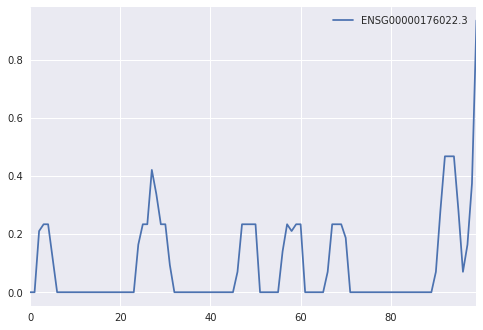

In [312]:
expect = pd.read_table(
    '/home/bay001/projects/codebase/rbp-maps/maps/density/test/test_matrix/ENSG00000176022.3.cds.density_values',
    names=['ENSG00000176022.3']
)
expect.plot()